# **EDA**

# **Какие датасеты планируется использовать?**

SOVA(Speech-to-Text):
https://github.com/sovaai/sova-dataset

Golos(Speech-to-Text):
https://github.com/sberdevices/golos

Dusha (SER):
https://github.com/salute-developers/golos/tree/master/dusha#dusha-dataset

## **Полезная инфа**

Сравнение открытых моделей на разных датасетах: https://alphacephei.com/nsh/2024/04/14/russian-models.html

## **Модели**

Используются три варианта модели Whisper и популярная модель Facebook Wav2Vec2 в качестве бейзлайна.

## **Датасет**

LibriSpeech test-clean — широко используемый набор для оценки ASR моделей.

## **Метрики**

**WER** — стандартная метрика для оценки ASR.

**Задержка** — среднее время обработки одного аудиофайла.

In [1]:
!pip install datasets
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.8 MB/s eta 0:00:00


In [2]:
import time
import torchaudio
import matplotlib.pyplot as plt
import pandas as pd
from transformers import pipeline
from datasets import load_dataset
from jiwer import wer

In [3]:
#Настройка моделей
models = {
    "whisper-small": pipeline("automatic-speech-recognition", model="openai/whisper-small"),
    "whisper-medium": pipeline("automatic-speech-recognition", model="openai/whisper-medium"),
    "whisper-large": pipeline("automatic-speech-recognition", model="openai/whisper-large"),
    "baseline": pipeline("automatic-speech-recognition", model="facebook/wav2vec2-large-960h-lv60-self")
}

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.17G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.85k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

Device set to use cuda:0


In [12]:
#Загрузка тестового датасета
dataset = load_dataset("patrickvonplaten/librispeech_asr_dummy", 'clean', split="validation", trust_remote_code=True)

In [13]:
#Функция для расчета метрик
def evaluate_model(model_name, model, dataset):
    wer_scores = []
    latencies = []

    print(f"\nНачинаем оценку модели: {model_name}")
    for sample in dataset:
        audio_path = sample["file"]
        reference = sample["text"].lower()

        # Загрузка аудиофайла
        waveform, sample_rate = torchaudio.load(audio_path)
        waveform = waveform.mean(0).numpy()  # Конвертируем в моно

        # Оценка времени выполнения
        start_time = time.time()
        prediction = model({"array": waveform, "sampling_rate": sample_rate})
        latencies.append(time.time() - start_time)

        # Предсказание модели
        hypothesis = prediction["text"].lower()
        wer_scores.append(wer(reference, hypothesis))

        print(f"Файл: {audio_path}, WER: {wer_scores[-1]:.2f}")

    avg_wer = sum(wer_scores) / len(wer_scores)
    avg_latency = sum(latencies) / len(latencies)

    return avg_wer, avg_latency

In [14]:
#Сравнение моделей
results = []
for model_name, model in models.items():
    avg_wer, avg_latency = evaluate_model(model_name, model, dataset)
    results.append({"model": model_name, "wer": avg_wer, "latency": avg_latency})


Начинаем оценку модели: whisper-small


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:512: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/128104/1272-128104-0000.flac, WER: 0.18
Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/128104/1272-128104-0001.flac, WER: 0.20
Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/128104/1272-128104-0002.flac, WER: 0.12
Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/128104/1272-128104-0003.flac, WER: 0.08
Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/128104/1272-128104-0004.flac, WER: 0.25
Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d867

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/128104/1272-128104-0009.flac, WER: 0.12
Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/128104/1272-128104-0010.flac, WER: 0.20
Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/128104/1272-128104-0011.flac, WER: 0.18
Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/128104/1272-128104-0012.flac, WER: 0.33
Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/128104/1272-128104-0013.flac, WER: 0.17
Файл: /root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d867

In [15]:
#Результаты
results_df = pd.DataFrame(results)
print("\nРезультаты сравнения моделей:")
print(results_df)


Результаты сравнения моделей:
            model       wer   latency
0   whisper-small  0.263673  0.545800
1  whisper-medium  0.246297  1.288454
2   whisper-large  0.220194  2.130511
3        baseline  0.046044  0.103995


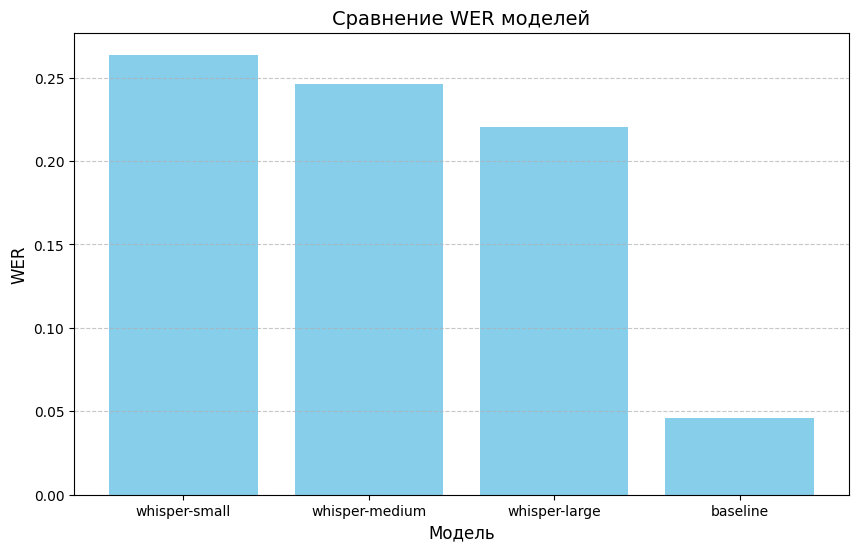

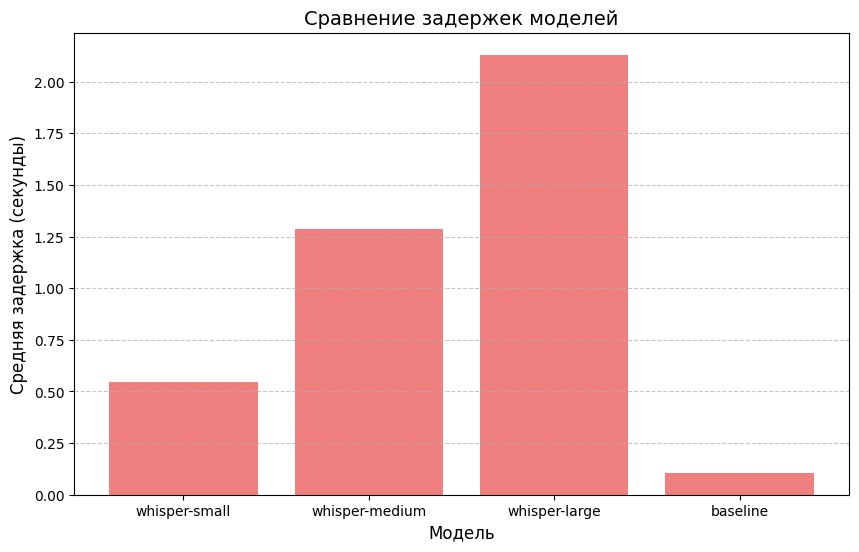

In [16]:
#Графики

# WER
plt.figure(figsize=(10, 6))
plt.bar(results_df["model"], results_df["wer"], color="skyblue")
plt.title("Сравнение WER моделей", fontsize=14)
plt.xlabel("Модель", fontsize=12)
plt.ylabel("WER", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Latency
plt.figure(figsize=(10, 6))
plt.bar(results_df["model"], results_df["latency"], color="lightcoral")
plt.title("Сравнение задержек моделей", fontsize=14)
plt.xlabel("Модель", fontsize=12)
plt.ylabel("Средняя задержка (секунды)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()